# Sorting Algorithm Tests

## Benchmark Code Setup

In [1]:
import random
import time
import copy
from collections import defaultdict, namedtuple

import matplotlib.pyplot as plt

In [7]:
TimedReturn = namedtuple('TimedReturn', ['ret', 'elapsed_seconds'])

def time_function(func, *args, **kwargs) -> TimedReturn:
    """
    How many seconds it took to execute function
    """
    # shallow copy params to avoid in place changes for benchmark inputs
    copied_args = tuple(copy.copy(a) for a in args)
    copied_kwargs = {k: copy.copy(v) for k, v in kwargs.items()}
    
    start = time.perf_counter()
    ret = func(*copied_args, **copied_kwargs)
    end = time.perf_counter()

    elapsed_seconds = end - start
    
    return TimedReturn(ret, elapsed_seconds)

def generate_random_int_array(size=100, start=-1000, end=1000, uniques=False) -> list:
    """
    Generate random int array with given constraints
    """
    if uniques:
        assert end - start + 1 >= size, "Range too small for unique values"
        return random.sample(range(start, end + 1), size)
        
    return [random.randint(start, end) for _ in range(size)]

def benchmark_sorting(algorithms, sizes, num_trials=3, uniques=False, **array_kwargs) -> dict:
    """
    Go through each function in algorithms and run consecutive trials of different sizes

    Return timings
    """
    results = defaultdict(list)

    for n in sizes:
        print(f"#️⃣ N: {n}\n")
        for name, func in algorithms:
            print(f"\t{name}")
            print("\t[ ", end="", flush=True)

            trials = []
            errors = []
            
            for _ in range(num_trials):
                arr = generate_random_int_array(n, uniques=uniques, **array_kwargs)
                try:
                    elapsed = time_function(func, arr).elapsed_seconds
                    symbol = "■"
                except Exception as e:
                    elapsed = None
                    symbol = "✖"
                    errors.append(e)
                trials.append(elapsed)
                print(symbol, end=" ", flush=True)

            print("]")

            if len(errors) == 0:
                avg = sum(trials) / len(trials)
                print(f"\t⏱️ Avg: {avg:.6f} s\n")
            else:
                avg = None
                print(f"\t⏱️ Avg: ❌\n")
                for i, error in enumerate(errors):
                    print(f"{i}: {error}")

            results[name].append(avg)

    return results

def print_summary(sizes, results):
    """
    Print summary
    """
    for name, times in results.items():
        print(f"{name}:")
        for n, time in zip(sizes, times):
            throughput = n / time if time else float('inf')
            print(f"  • {n:,} elems in {time:.6f}s ({throughput:,.0f} e/s)")
        print()

# Benchmark Tests

In [ ]:
import import_ipynb
import sorting_algorithms #.ipynb

In [8]:
trial_sizes = [500, 1000, 2000, 5000, 10000, 20000, 40000]
    
algorithms = [
    ("Built-in sorted", sorted), 
    ("Bubble Sort", sorting_algorithms.bubble_sort),
    ("Selection Sort", sorting_algorithms.selection_sort),
    ("Insertion Sort", sorting_algorithms.insertion_sort),
    ("Top Down Merge Sort", sorting_algorithms.top_down_merge_sort),
    ("Bottom Up Merge Sort", sorting_algorithms.bottom_up_merge_sort_less_space),
]

results = benchmark_sorting(algorithms, trial_sizes)

#️⃣ N: 500

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000044 s

	Bubble Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.009882 s

	Selection Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.002486 s

	Insertion Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.003366 s

	Top Down Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000363 s

	Bottom Up Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000314 s

#️⃣ N: 1000

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000063 s

	Bubble Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.026640 s

	Selection Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.006758 s

	Insertion Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.011543 s

	Top Down Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000607 s

	Bottom Up Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000518 s

#️⃣ N: 2000

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000103 s

	Bubble Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.104009 s

	Selection Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.025723 s

	Insertion Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.046149 s

	Top Down Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.001306 s

	Bottom Up Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.001165 s

#️⃣ N: 5000

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000289 s

	Bubble S

# Benchmark Summary

In [9]:
print_summary(trial_sizes, results)

Built-in sorted:
  • 500 elems in 0.000044s (11,278,194 e/s)
  • 1,000 elems in 0.000063s (15,824,282 e/s)
  • 2,000 elems in 0.000103s (19,433,197 e/s)
  • 5,000 elems in 0.000289s (17,316,857 e/s)
  • 10,000 elems in 0.000626s (15,985,447 e/s)
  • 20,000 elems in 0.001337s (14,957,465 e/s)
  • 40,000 elems in 0.002852s (14,025,449 e/s)

Bubble Sort:
  • 500 elems in 0.009882s (50,597 e/s)
  • 1,000 elems in 0.026640s (37,537 e/s)
  • 2,000 elems in 0.104009s (19,229 e/s)
  • 5,000 elems in 0.673934s (7,419 e/s)
  • 10,000 elems in 2.685204s (3,724 e/s)
  • 20,000 elems in 11.070474s (1,807 e/s)
  • 40,000 elems in 45.636449s (876 e/s)

Selection Sort:
  • 500 elems in 0.002486s (201,104 e/s)
  • 1,000 elems in 0.006758s (147,962 e/s)
  • 2,000 elems in 0.025723s (77,753 e/s)
  • 5,000 elems in 0.164964s (30,310 e/s)
  • 10,000 elems in 0.687636s (14,543 e/s)
  • 20,000 elems in 2.656817s (7,528 e/s)
  • 40,000 elems in 10.878980s (3,677 e/s)

Insertion Sort:
  • 500 elems in 0.003366

# Plot

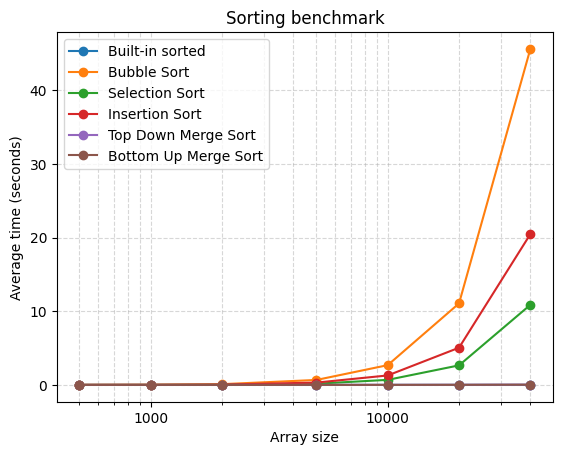

In [11]:
fig, ax = plt.subplots()

# plot results
for name, times in results.items():
    ax.plot(trial_sizes, times, marker='o', label=name)

# logarithmic scale for x axis
ax.set_xscale('log')
ax.xaxis.set_major_formatter(plt.ScalarFormatter())

ax.set_title("Sorting benchmark")
ax.set_xlabel('Array size')
ax.set_ylabel('Average time (seconds)')
ax.legend()
ax.grid(True, which='both', ls='--', alpha=0.5)

plt.show()